In [21]:
%load_ext autoreload
%autoreload 2

import glob
import sys
sys.path.insert(0, "../")

from motiflets.competitors import *
from motiflets.plotting import *

import pandas as pd
import seaborn as sns

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")


def load_pyattimo(df_all):
    paths = {
        "200GB": "../tests/results/pyattimo_0.7.0_200GB",    
        "20GB": "../tests/results/pyattimo_0.7.0_20GB",
        "8GB": "../tests/results/pyattimo_0.7.0_8GB",
    }
    
    for name in paths:
        dir_path = paths[name]
        if os.path.isdir(dir_path):
            print(f"Reading from{dir_path}")
            csv_files = glob.glob(os.path.join(dir_path, "*.csv"))
            dfs = [pd.read_csv(file) for file in csv_files]
            
            for key, df in zip(csv_files, dfs):
                filename = os.path.basename(key)
                end = filename.find("pyattimo")
                df["dataset"] = filename[14:end-4]
                df["sampling"] = 1
            
            df_config = pd.concat(dfs, ignore_index=True)
            df_config["version"] = "pyattimo " + name
        
            # df_config.info()
            
            df_all = pd.concat([df_all, df_config], ignore_index=True)
        else:
            print("Does not exist")

    return df_all

def load_pyattimo_sub(df_all):
    paths = {
        "8GB sub": "../tests/results/pyattimo_0.7.0_8GB_sub",
    }
    
    for name in paths:
        dir_path = paths[name]
        if os.path.isdir(dir_path):
            print(f"Reading from{dir_path}")
            csv_files = glob.glob(os.path.join(dir_path, "*.csv"))
            dfs = [pd.read_csv(file) for file in csv_files]
            
            for key, df in zip(csv_files, dfs):
                factor = key.split("_")[-1][:-4]
                if int(factor) != 8:            
                    filename = os.path.basename(key)
                    end = filename.find("pyattimo")
                    df["dataset"] = filename[14:end-4]
                    df["version"] = "pyattimo / PAA " + key.split("_")[-1][:-4]
                    df["sampling"] = key.split("_")[-1][:-4]
                    
            df_config = pd.concat(dfs, ignore_index=True)
            df_all = pd.concat([df_all, df_config], ignore_index=True)
        else:
            print("Does not exist")

    return df_all
    

def load_scalable(df_all):
    paths = {
        "scalable_sub": "../tests/results/scalable_sub",    
    }
    
    for name in paths:
        dir_path = paths[name]
        if os.path.isdir(dir_path):
            print(f"Reading from{dir_path}")
            csv_files = glob.glob(os.path.join(dir_path, "*.csv"))
            dfs = [pd.read_csv(file) for file in csv_files]
            
            for key, df in zip(csv_files, dfs):
                factor = key.split("_")[-1][:-4]
                if int(factor) != 8:
                    filename = os.path.basename(key)
                    # df["dataset"] = filename.split("_")[2]
                    end = filename.find("scalable")
                    df["dataset"] = filename[14:end-4]            
                    df["version"] = "MASS / PAA " + key.split("_")[-1][:-4]
                    df["sampling"] = key.split("_")[-1][:-4]
                    
            df_config = pd.concat(dfs, ignore_index=True)
            df_all = pd.concat([df_all, df_config], ignore_index=True)
        else:
            print("Does not exist")

    return df_all

def load_pynndescent(df_all):
    paths = {
        "pynndescent": "../tests/results/pynndescent",    
    }
    
    for name in paths:
        dir_path = paths[name]
        if os.path.isdir(dir_path):
            print(f"Reading from{dir_path}")
            csv_files = glob.glob(os.path.join(dir_path, "*.csv"))
            dfs = [pd.read_csv(file) for file in csv_files]
            
            for key, df in zip(csv_files, dfs):
                filename = os.path.basename(key)
                end = filename.find("pynndescent")
                df["dataset"] = filename[14:end-4]            
                df["version"] = "pynndescent"
                df["sampling"] = 1
                
            df_config = pd.concat(dfs, ignore_index=True)
            df_all = pd.concat([df_all, df_config], ignore_index=True)
        
            # display(df_config)
        else:
            print("Does not exist")
                
    return df_all

def load_faiss(df_all):
    paths = {
        "HNSW": "../tests/results/faiss_HNSW",
        "IVF": "../tests/results/faiss_IVF",
        "IVFPQ": "../tests/results/faiss_IVFPQ",
    }
    
    for name in paths:
        dir_path = paths[name]
        if os.path.isdir(dir_path):
            print(f"Reading from{dir_path}")
            csv_files = glob.glob(os.path.join(dir_path, "*.csv"))
            dfs = [pd.read_csv(file) for file in csv_files]
            
            for key, df in zip(csv_files, dfs):
                filename = os.path.basename(key)
                end = filename.find("faiss_backend")
                df["dataset"] = filename[14:end-4]
                # print(filename[14:end-4])
                df["version"] = name
                df["sampling"] = 1
                
            df_config = pd.concat(dfs, ignore_index=True)
            df_all = pd.concat([df_all, df_config], ignore_index=True)
    
            # display(df_config)
        else:
            print("Does not exist")

    return df_all        

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
df_all = pd.DataFrame()
df_all = load_pyattimo(df_all)
df_all = load_pyattimo_sub(df_all)
df_all = load_scalable(df_all)
df_all = load_faiss(df_all)
df_all = load_pynndescent(df_all)

# not enough data from all datasets
df_all = df_all[df_all["motif length"] != 8192]
# display(df_all)

Reading from../tests/results/pyattimo_0.7.0_200GB
Reading from../tests/results/pyattimo_0.7.0_20GB
Reading from../tests/results/pyattimo_0.7.0_8GB
Reading from../tests/results/pyattimo_0.7.0_8GB_sub
Reading from../tests/results/scalable_sub
Reading from../tests/results/faiss_HNSW
Reading from../tests/results/faiss_IVF
Reading from../tests/results/faiss_IVFPQ
Reading from../tests/results/pynndescent


In [23]:
df_all["version"].unique()

array(['pyattimo 200GB', 'pyattimo 20GB', 'pyattimo 8GB',
       'pyattimo / PAA 32', 'pyattimo / PAA 64', 'pyattimo / PAA 16', nan,
       'MASS / PAA 32', 'MASS / PAA 64', 'MASS / PAA 16', 'HNSW', 'IVF',
       'IVFPQ', 'pynndescent'], dtype=object)

In [24]:
print("Total number of datasets:    ", df_all.dataset.unique().shape[0])

# Filter
counts = df_all.groupby(["dataset", "version"]).size()
counts_df = counts.reset_index(name='count')

count_versions = df_all.version.nunique()

# filter datasets where not all indices ran
def all_counts_equal(group):
    return group['version'].nunique() >= count_versions-3 and group['count'].min() >= 3

datasets_to_keep = counts_df.groupby('dataset').filter(all_counts_equal)['dataset'].unique()

print("Filtered number of datasets: ", datasets_to_keep.shape[0])
filtered_df = df_all[df_all["dataset"].isin(datasets_to_keep)]

df_display = pd.DataFrame(data=filtered_df[["dataset", "length"]].drop_duplicates().sort_values(by="length"))
display(df_display.reset_index(drop=True))

Total number of datasets:     25
Filtered number of datasets:  19


,dataset,length
0,EOG_one_hour_50_Hz,180000
1,Challenge2009TestSetA_101a,440001
2,swtAttack7,449919
3,swtAttack38,449919
4,BlackLeggedKittiwake,1288330
5,stator_winding,1330816
6,EOG_one_hour_400_Hz,1439997
7,Challenge2009Respiration500HZ,1799997
8,HAR_Ambient_Sensor_Data,1875227
9,water,2100777


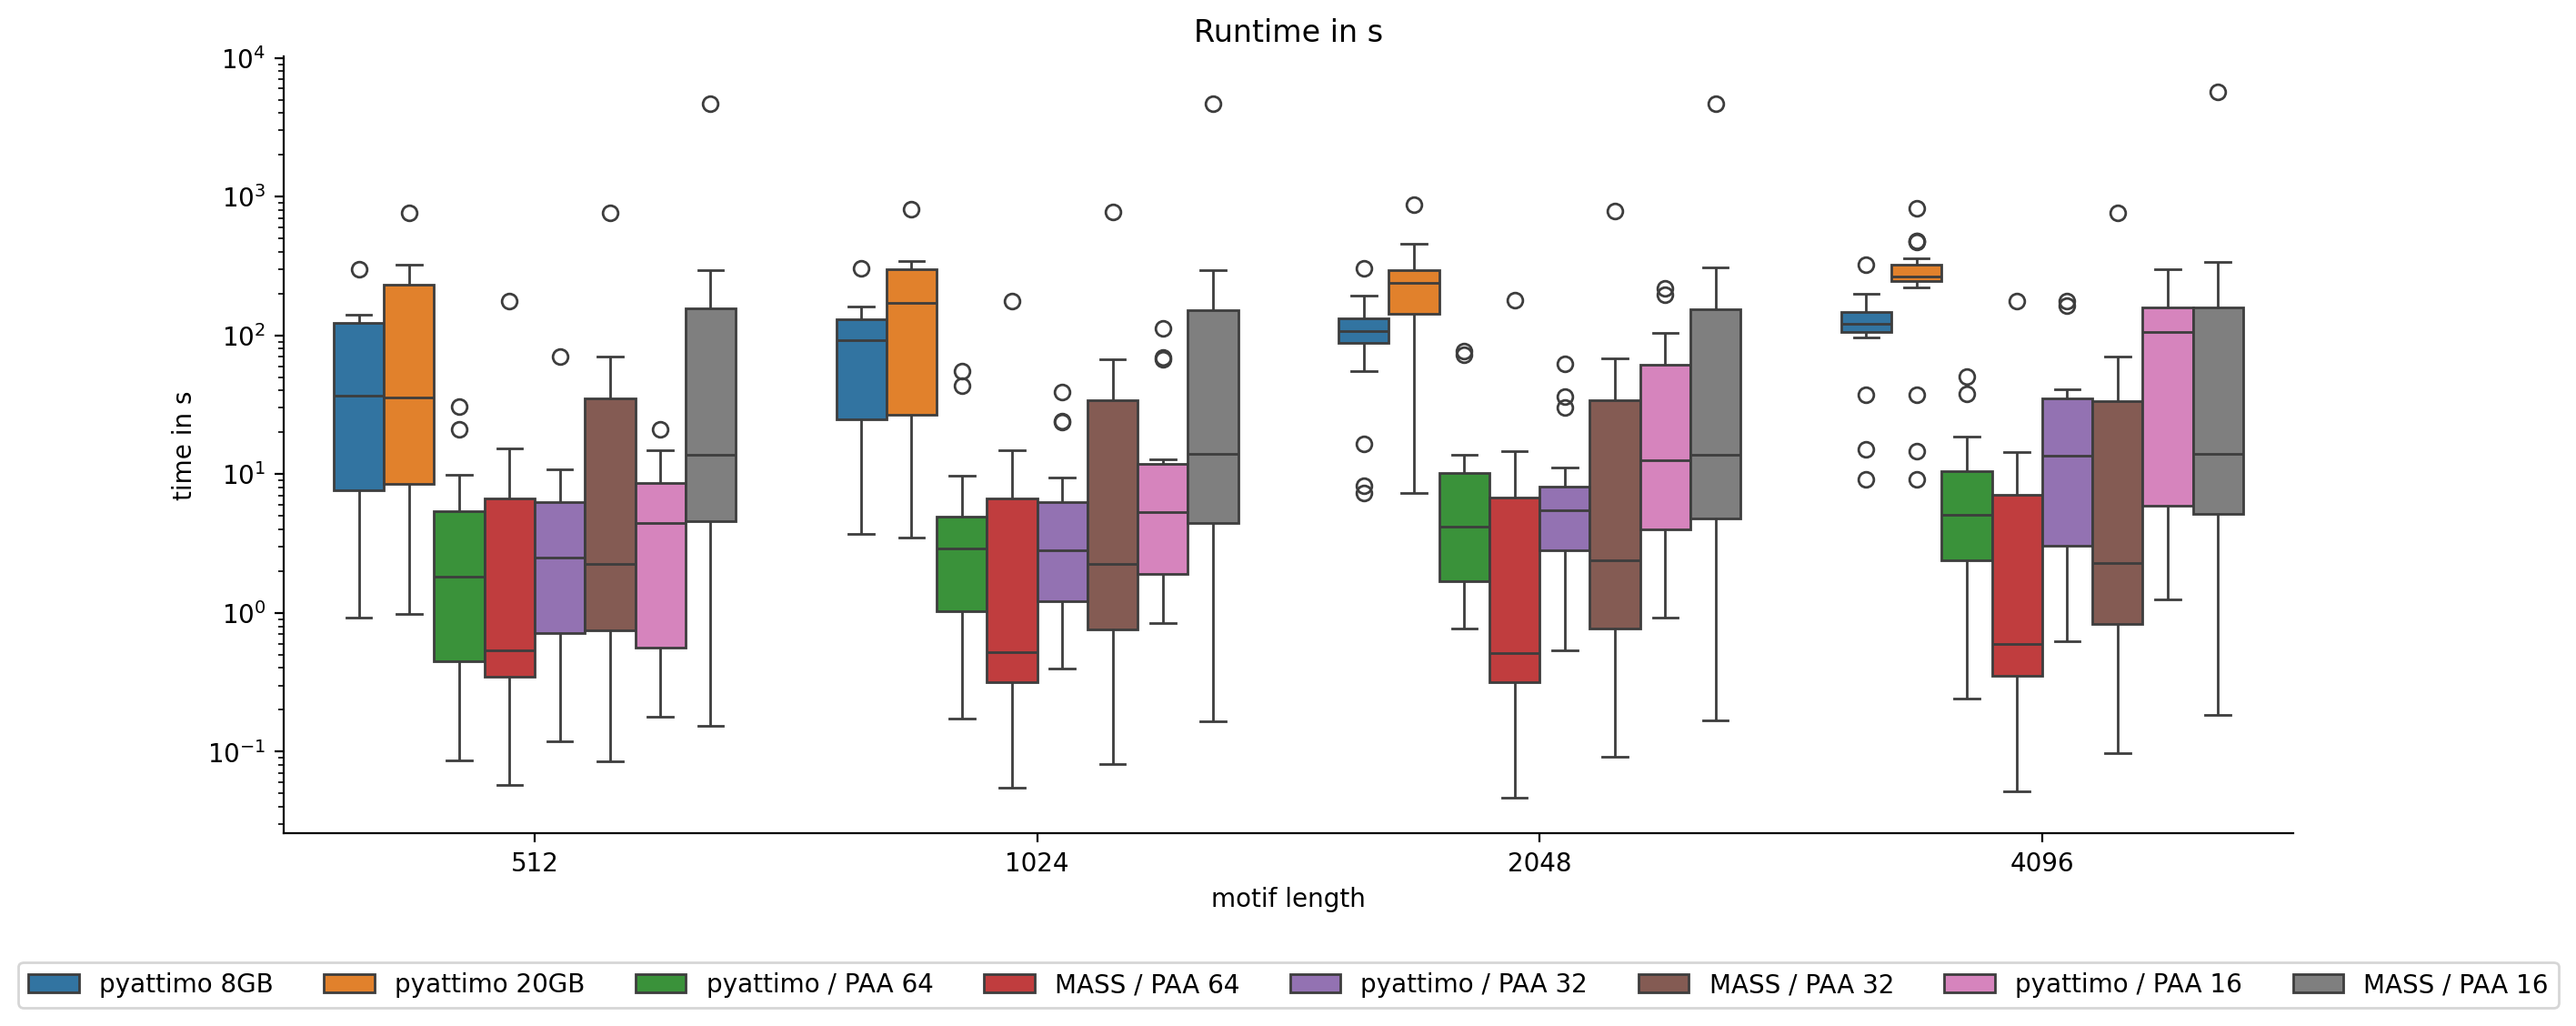

In [25]:
custom_order = ["pyattimo 8GB", 
                "pyattimo 20GB", 
                
                'pyattimo / PAA 64', 
                "MASS / PAA 64", 
                
                'pyattimo / PAA 32', 
                "MASS / PAA 32", 

                'pyattimo / PAA 16',
                "MASS / PAA 16",                
               ]
filtered_df = filtered_df[filtered_df.version.isin(custom_order)]

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.boxplot(
    y="time in s", 
    hue="version", 
    x="motif length", 
    data=filtered_df, 
    # palette="muted", 
    ax=ax, 
    # err_style="bars", 
    hue_order=custom_order
)
# ax.tick_params(axis='x', rotation=45)

sns.despine()
plt.tight_layout()
ax.set_title("Runtime in s")
plt.yscale('log')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(custom_order))

plt.show()

In [6]:
filtered_df.pivot_table(values=["time in s"], index=["version"], columns=["motif length"], aggfunc='median')

time in s                                    
motif length            512         1024        2048        4096
version                                                         
MASS / PAA 16      17.492426   17.326866   17.377125   17.674430
MASS / PAA 32       2.734524    2.728009    2.671211    2.927534
MASS / PAA 64       0.638931    0.649556    0.643653    0.618302
pyattimo / PAA 16   3.375137    5.300510   12.677206   99.903513
pyattimo / PAA 32   2.497744    2.821666    5.524815   13.534851
pyattimo / PAA 64   1.813059    2.896748    4.192893    5.051780
pyattimo 20GB      16.338744  170.534294  219.639998  264.525826
pyattimo 8GB       15.905426   91.916094  105.479895  121.222417

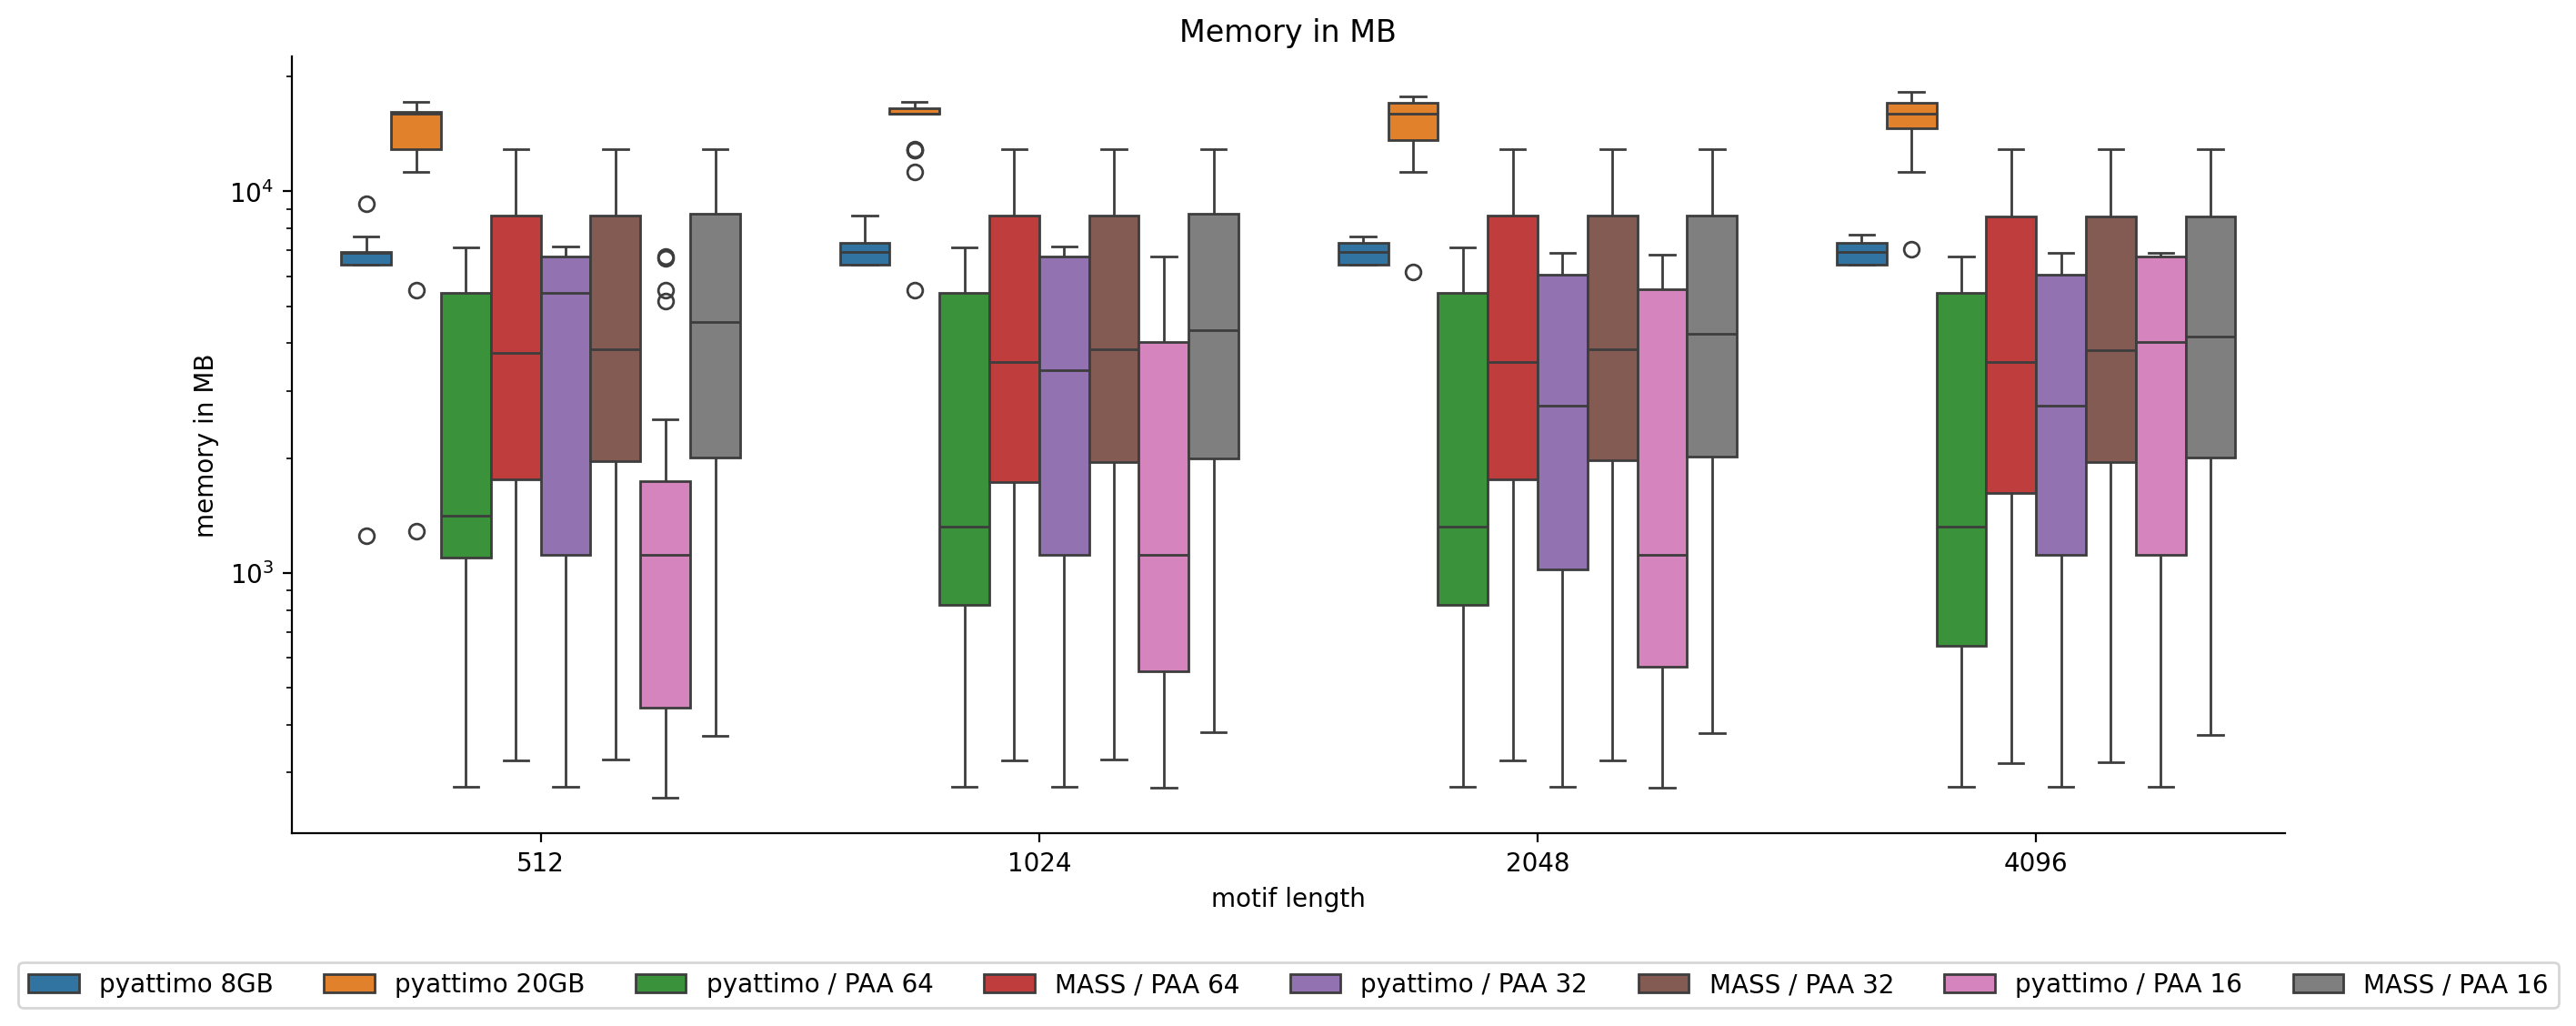

In [7]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.boxplot(
    y="memory in MB", 
    hue="version", 
    x="motif length", 
    data=filtered_df, 
    # palette="muted", 
    ax=ax,    
    hue_order=custom_order
)
# ax.tick_params(axis='x', rotation=45)

sns.despine()
plt.tight_layout()
ax.set_title("Memory in MB")
plt.yscale('log')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(custom_order))

plt.show()

In [8]:
filtered_df.pivot_table(values=["memory in MB"], index=["version"], columns=["motif length"], aggfunc='median')

memory in MB                                          
motif length               512           1024          2048          4096
version                                                                  
MASS / PAA 16       4543.802734   4337.349609   4239.453125   4154.841797
MASS / PAA 32       3863.462891   3863.455078   3862.919922   3837.908203
MASS / PAA 64       3772.509766   3567.638672   3567.087891   3566.544922
pyattimo / PAA 16   1115.503906   1116.550781   1116.550781   4026.449219
pyattimo / PAA 32   5424.917969   3403.617188   2737.621094   2737.621094
pyattimo / PAA 64   1409.500000   1319.769531   1319.769531   1319.769531
pyattimo 20GB      16021.960938  16021.960938  16021.960938  16021.960938
pyattimo 8GB        6913.496094   6926.464844   6926.464844   6926.464844

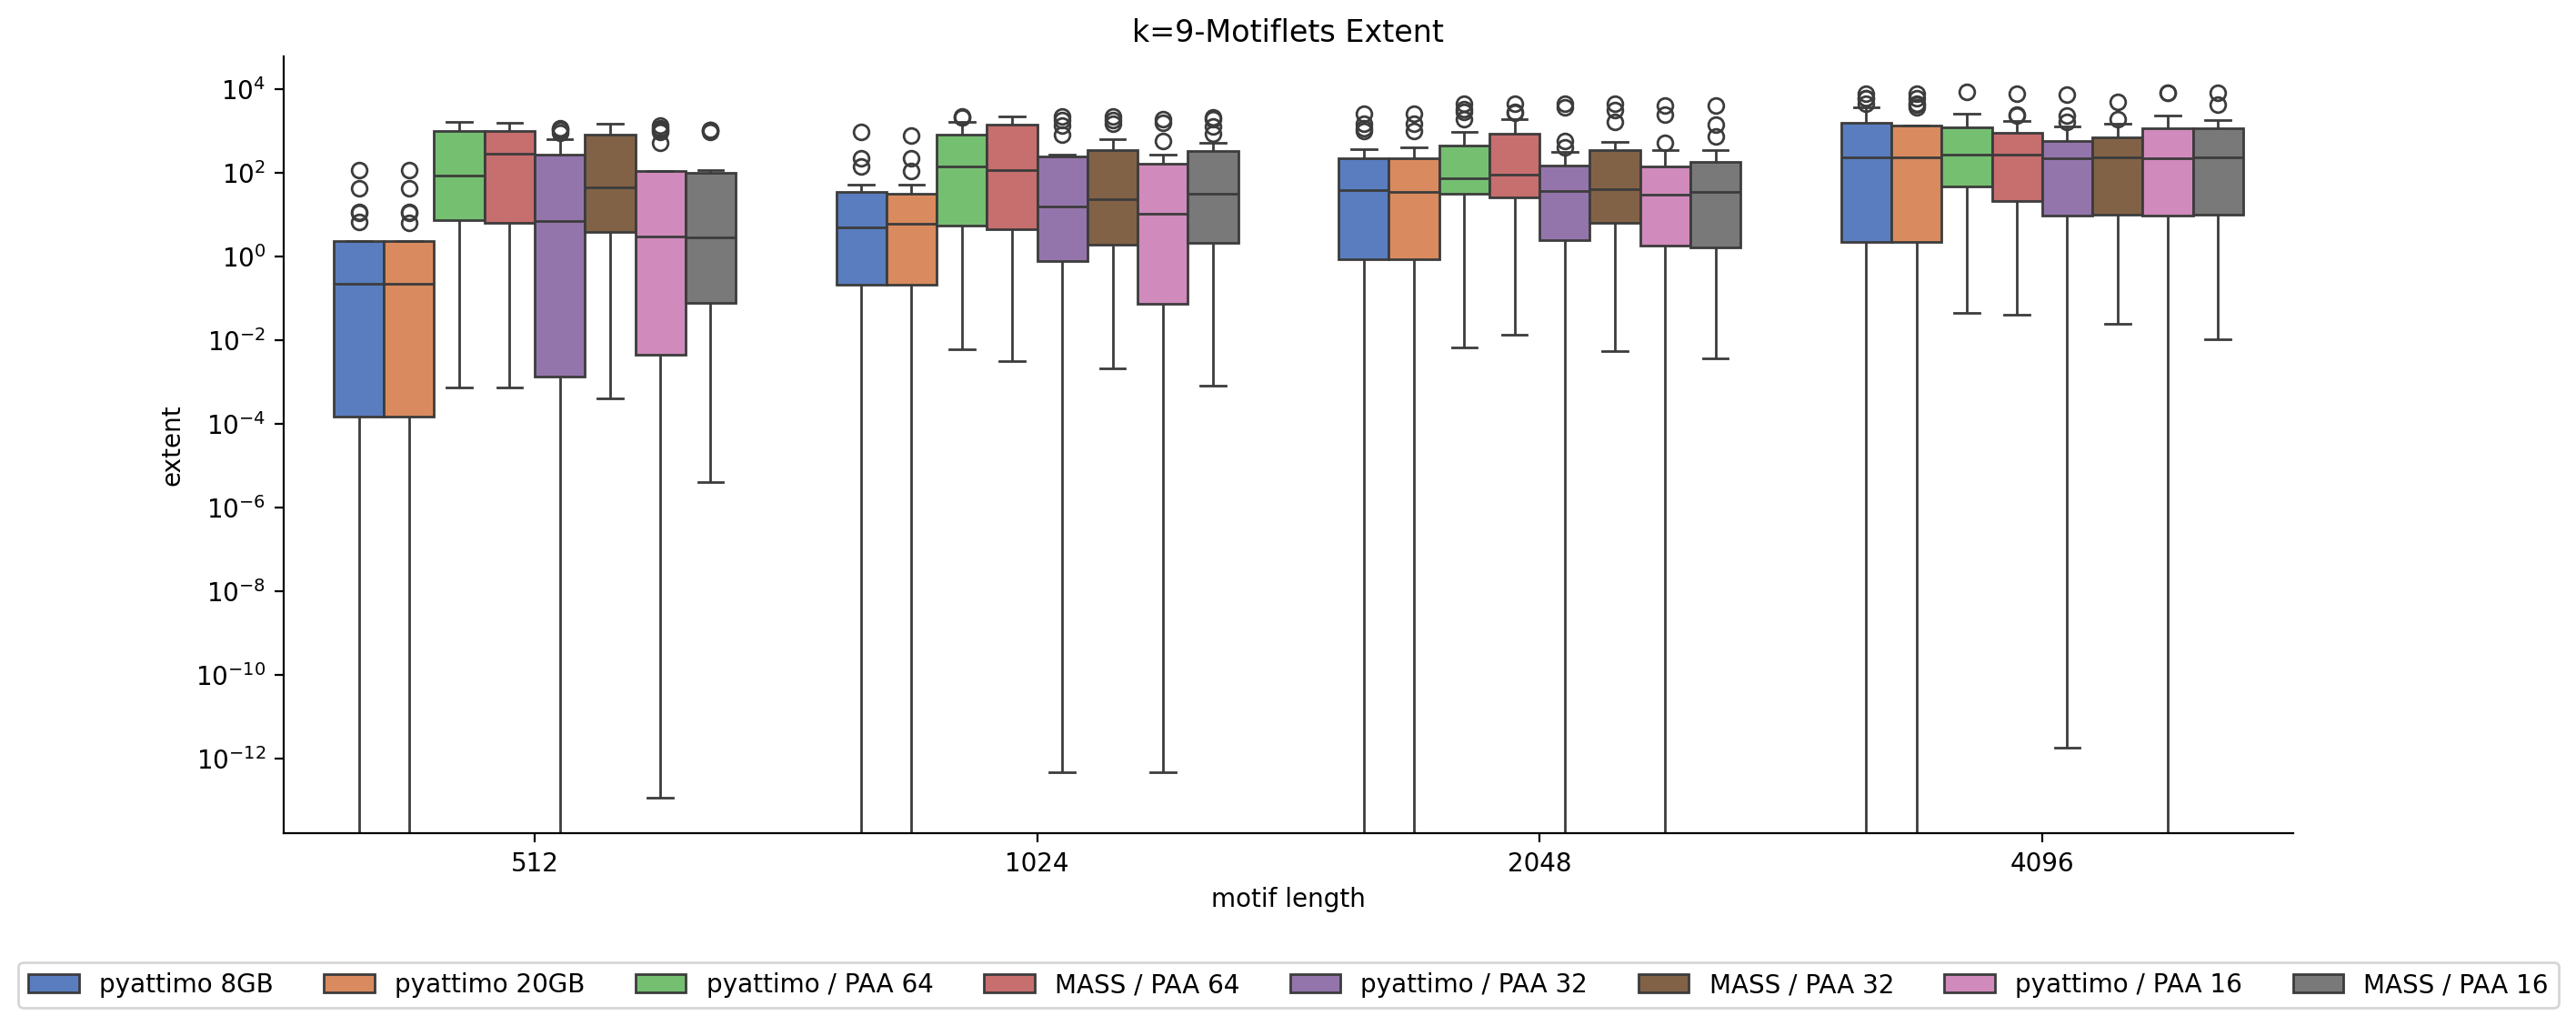

In [9]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.boxplot(
    y="extent", 
    hue="version", 
    x="motif length", 
    data=filtered_df, 
    palette="muted", 
    ax=ax,
    hue_order=custom_order
)
# ax.tick_params(axis='x', rotation=45)

sns.despine()
plt.tight_layout()
ax.set_title("k=9-Motiflets Extent")
plt.yscale('log')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(custom_order))

plt.show()

In [10]:
filtered_df.pivot_table(values=["extent"], index=["version"], columns=["motif length"], aggfunc='median')

extent                                   
motif length             512         1024       2048        4096
version                                                         
MASS / PAA 16        2.777930   30.547005  33.711483  231.868397
MASS / PAA 32       43.290207   22.489837  40.711002  230.389012
MASS / PAA 64      274.298203  115.865789  90.920374  261.411452
pyattimo / PAA 16    2.977087   10.408983  29.647463  216.119490
pyattimo / PAA 32    6.880043   15.201710  36.291960  214.431299
pyattimo / PAA 64   82.905738  138.152296  73.804832  272.162718
pyattimo 20GB        0.218463    5.827156  33.895422  233.962266
pyattimo 8GB         0.218463    4.950709  37.884308  235.245272

,length,motif length,backend,time in s,memory in MB,extent,motiflet,elbows,dataset,version
121,1288330,4096,pyattimo (delta=0.1),291.514261,12858.132812,182.115612,[ 853273 329299 744826 47752 1176787 6582...,[7],BlackLeggedKittiwake,pyattimo 20GB
122,1288330,2048,pyattimo (delta=0.1),313.718209,12858.132812,27.396193,[ 771037 687078 583426 745956 1177894 488...,[6],BlackLeggedKittiwake,pyattimo 20GB
123,1288330,1024,pyattimo (delta=0.1),309.036395,12858.132812,4.993370,[1131642 837827 944930 67826 236716 7565...,[7],BlackLeggedKittiwake,pyattimo 20GB
124,1288330,512,pyattimo (delta=0.1),321.698511,12858.132812,1.401892,[ 418932 413523 1131525 27595 1021904 11979...,[3 6],BlackLeggedKittiwake,pyattimo 20GB
126,23999997,4096,pyattimo (delta=0.1),29.714487,15964.421875,0.001134,[ 1602904 13061944 15910904 9075064 23125464 ...,[6 8],FingerFlexionECoG,pyattimo 20GB
...,...,...,...,...,...,...,...,...,...,...
1115,7583000,512,scalable (subsampling=64),14.004813,8785.574219,250.283722,[2651584 2674752 2580864 2707904 2464384 28146...,[4 7],Lab_FD_061014,MASS / PAA 64
1117,2100777,4096,scalable (subsampling=32),3.197228,8572.593750,212.630043,[ 548000 742208 1099200 230944 857216 9553...,[4],water,MASS / PAA 32
1118,2100777,2048,scalable (subsampling=32),2.780268,8620.593750,30.875329,[ 29536 116256 736512 1082304 1295552 8172...,[7],water,MASS / PAA 32
1119,2100777,1024,scalable (subsampling=32),2.872512,8620.593750,1460.524777,[1607776 916224 1022464 1550688 2096896 13889...,[2],water,MASS / PAA 32


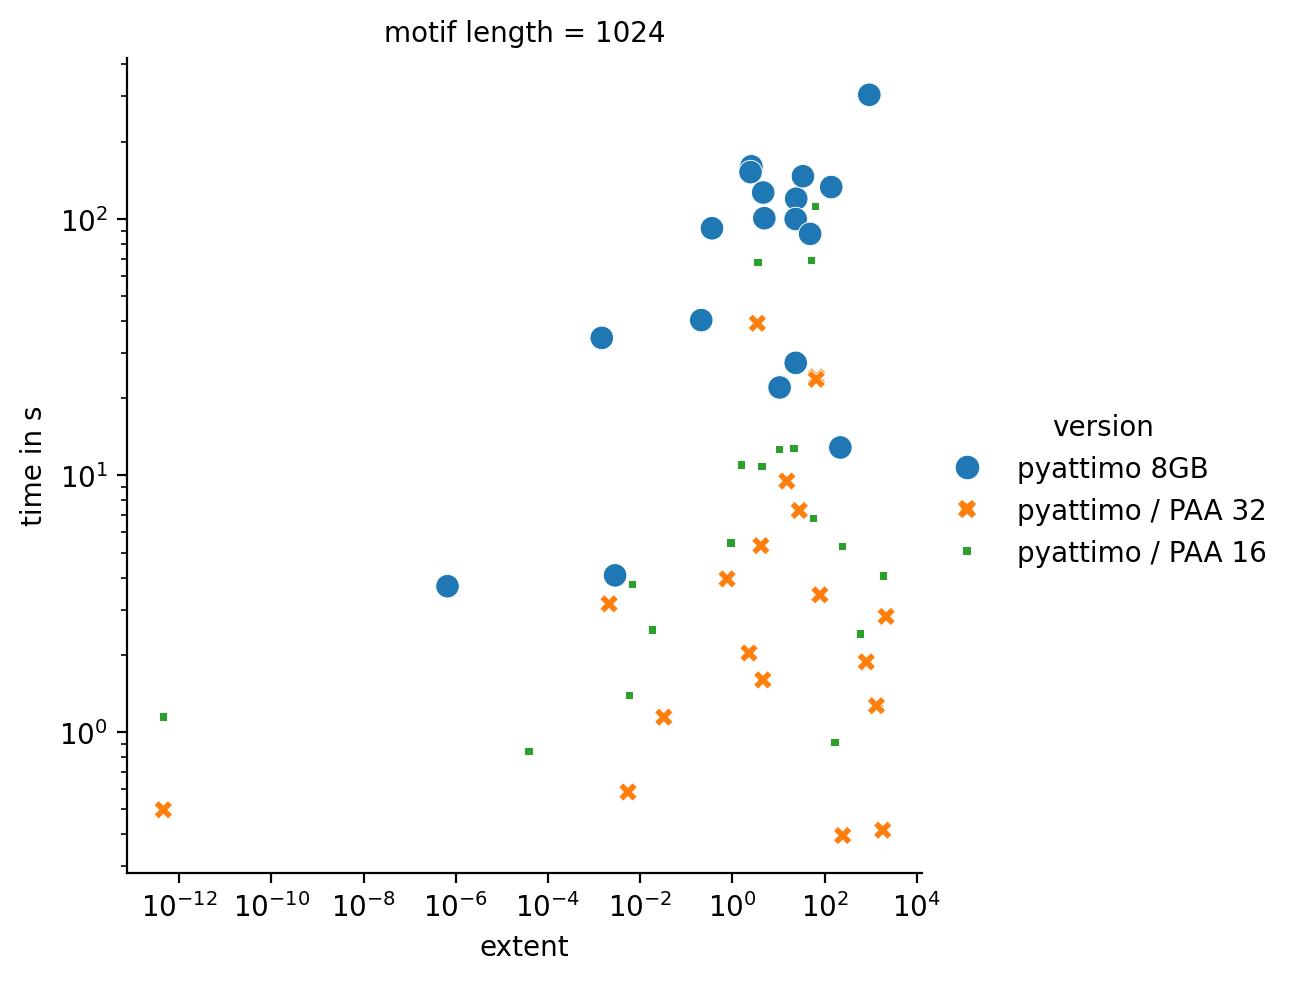

In [75]:
custom_order = ["pyattimo 8GB", 
                # "pyattimo 20GB", 
                
                #'pyattimo / PAA 64', 
                #"MASS / PAA 64", 
                
                'pyattimo / PAA 32', 
                #"MASS / PAA 32", 

                'pyattimo / PAA 16',
                #"MASS / PAA 16",                
               ]

sampled_df = filtered_df[filtered_df.version.isin(custom_order)]
sampled_df = sampled_df[sampled_df["motif length"] == 1024]
# display(sampled_df)
sns.relplot(x="extent", y="time in s", hue="version", 
            kind='scatter', style="version", 
            col="motif length", size="version",
            data=sampled_df)
plt.yscale('log')
plt.xscale('log')
plt.show()

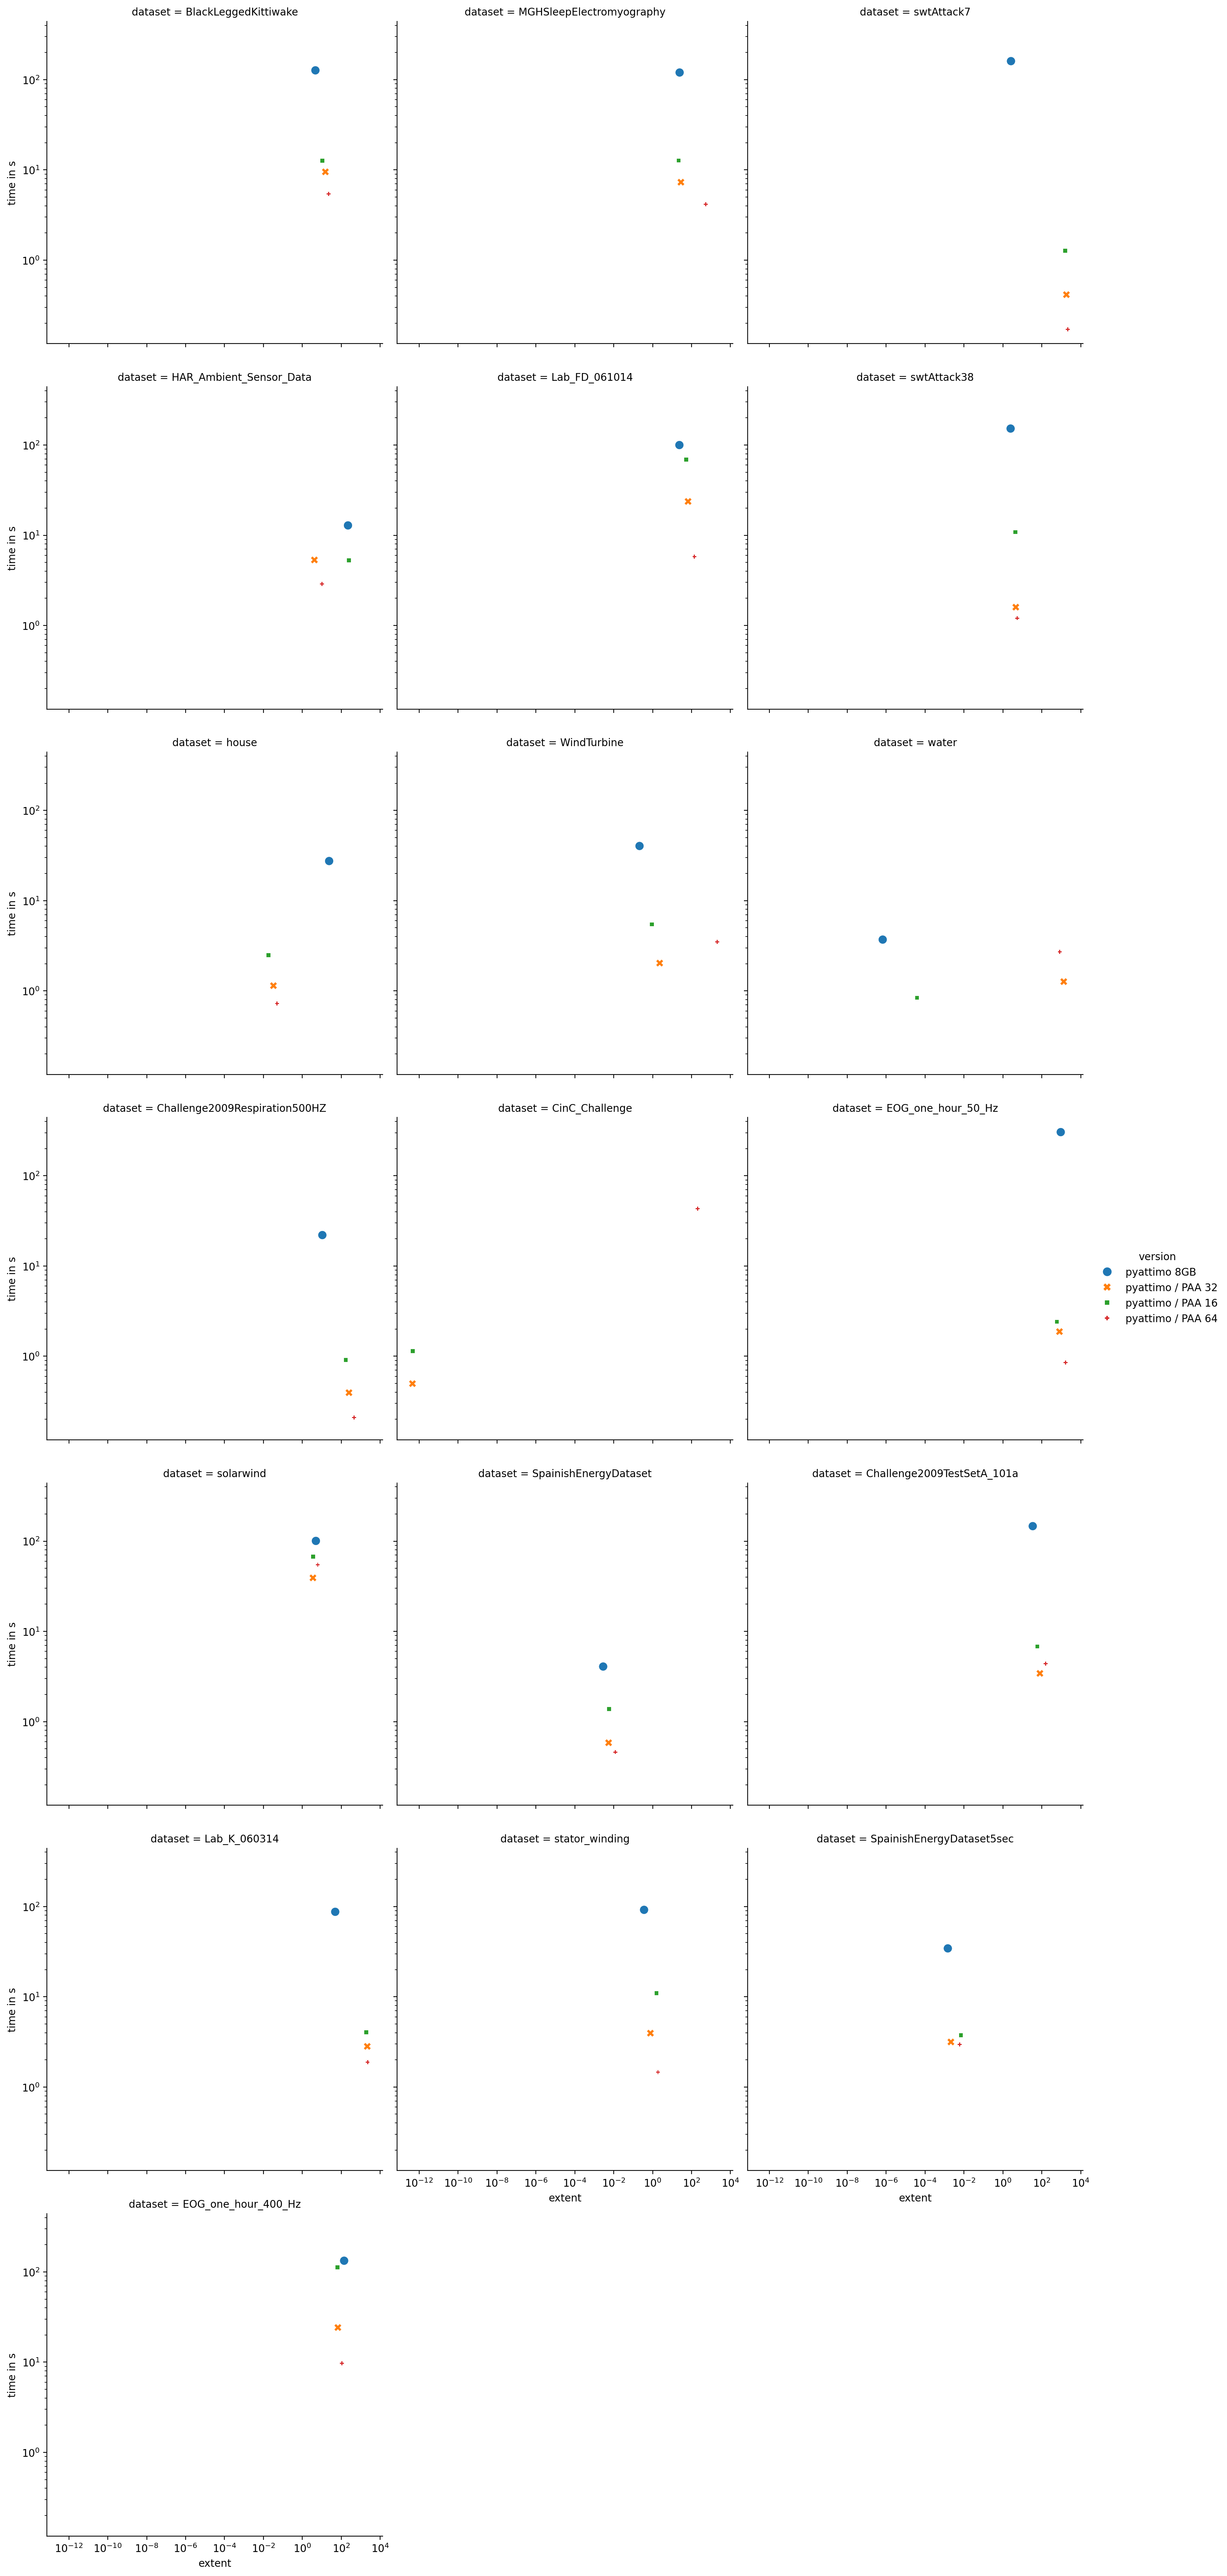

In [85]:
custom_order = ["pyattimo 8GB", 
                #"pyattimo 20GB", 
                
                'pyattimo / PAA 64', 
                #"MASS / PAA 64", 
                
                'pyattimo / PAA 32', 
                #"MASS / PAA 32", 

                'pyattimo / PAA 16',
                #"MASS / PAA 16",                
               ]

sampled_df = filtered_df[filtered_df.version.isin(custom_order)]
sampled_df = sampled_df[sampled_df["motif length"] == 1024]
# display(sampled_df)
sns.relplot(x="extent", y="time in s", hue="version", 
            kind='scatter', style="version",
            col="dataset", size="version", col_wrap=3,
            data=sampled_df)
plt.yscale('log')
plt.xscale('log')
plt.show()